## RC4

File name:revil.bin

SHA256: 329983DC2A23BD951B24780947CB9A6AE3FB80D5EF546E8538DFD9459B176483

The sample uses RC4 algorithm to decrypt the second stage payload from its enc section.

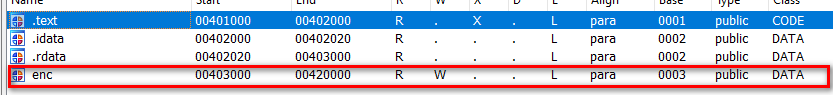

The RC4 algorithm exists in function 0x0040110B. Its hard-coded RC4 key is: kZlXjn3o373483wb6ne1LIBNWD3KWBEK

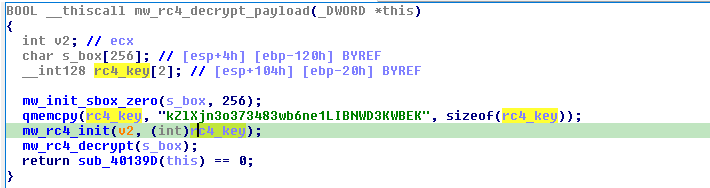

Function mw_rc4_init is KSA which is used to initialize S box. A variable-length key from 1 to 256 bytes is used to initialize a 256-byte state vector S, with elements S[0] to S[255]. Function mw_rc4_decrypt is used to decrypt the encrypted payload.The encrypted data length is 0x1CE00.

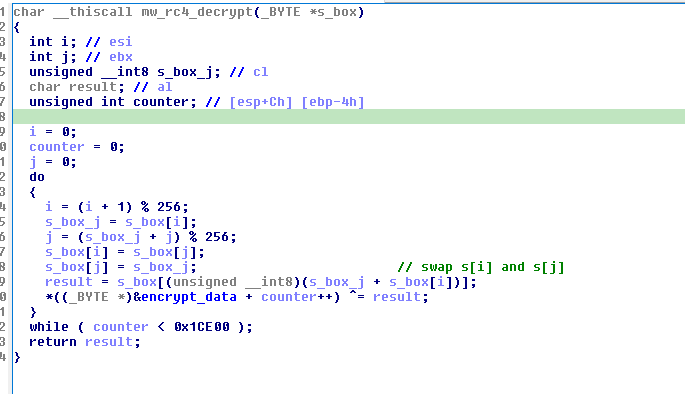


Note the encrypte_data starts from the section enc:

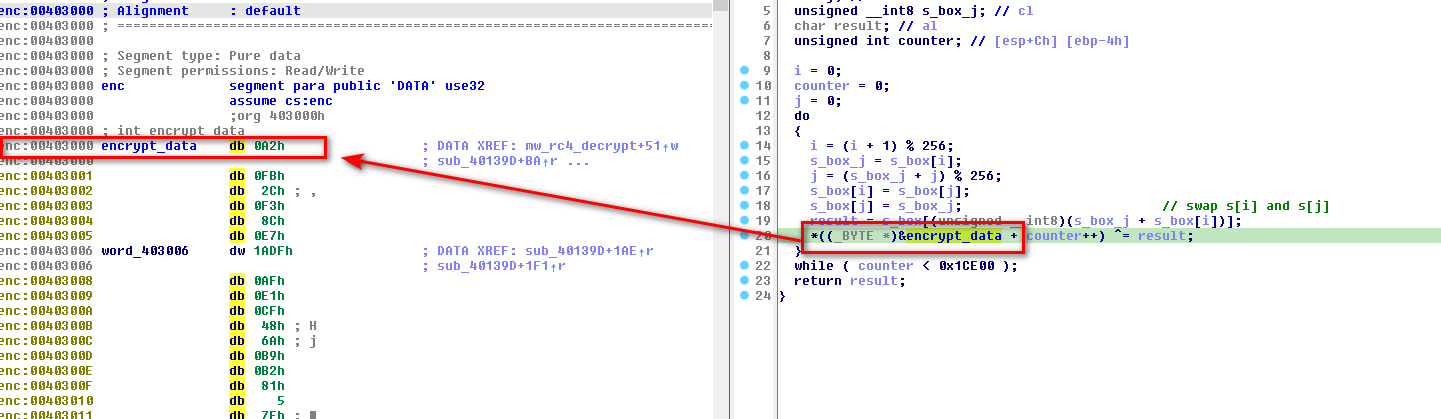

To decrypt the RC4 encrypted payload, I created a simple Python script:

In [12]:
import pefile
from arc4 import ARC4

pe = pefile.PE("/tmp/revil.bin")
section_name = 'enc'
key = b'kZlXjn3o373483wb6ne1LIBNWD3KWBEK'

for section in pe.sections:
    if bytes(section_name, 'utf-8') in section.Name:
        enc_data = section.get_data()

        
arc4 = ARC4(key)
dec = arc4.decrypt(enc_data)

f = open("/tmp/dec.bin", "wb")
f.write(dec)
f.close()